# DSCI 100 Group 28 Project Report:

## Title: Predictability of Heart Disease From Clinical Factors

#### Authors:
##### Ivy Li 80002512
##### Wendy Liang 26036525
##### Julia Hudea 18271156

## Introduction:
Heart disease, also known as cardiovascular disease, is a predominant cause of death globally, accounting for 17.9 million mortalities annually. In addition to lifestyle habits and medical treatments, early identification of individuals at high risk for heart disease is crucial for effective prevention. Furthermore, there is growing interest in developing predictive models that can accurately assess the risk of heart disease diagnosis based on various cardiovascular conditions and factors.

In this project, our aim is to determine the feasibility of predicting the likelihood of an individual having heart disease based on routine clinical assessments associated with the disease, through a classification model.

Our team decided to work with the Heart Disease Data from UCI Machine Learning Repository, in particular the “reprogressed.hungarian.data”. The dataset contains 14 variables associated with heart disease. When selecting variables to predict the heart disease diagnosis, we kept in mind that it is essential to choose factors that are known to have a significant impact on heart health and that could potentially contribute to heart disease. 

Our prediction model aims to answer the questions: **How accurately do routine clinical assessment values predict the diagnosis of heart disease?**

#### LEGEND:

1. age = age
2. sex = sex (1/0)
3. cp = chest pain (4 classifications)
4. trestbps = resting blood pressure (mm Hg)
5. chol = serum cholestrol (mg/dl)
6. fbs = fasting blood sugar (1/0, yes/no)
7. restecg = resting electrocardiographic results  (3 classifications)
8. thalach = maximum heart rate achieved 
9. exang = exercise induced angina (1/0, yes/no)
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope = slope of the peak exercise ST segment  (3 classifications)
12. ca = number of major vessels (0-3) colored by flourosopy 
13. hal = histidine ammonia-lyase (HAL) gene : 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. num = diagnosis of heart disease (angiographic disease status) (0/1) 	-- Value 0: < 50% diameter narrowing  	-- Value 1: > 50% diameter narrowing 

## Methods and Results

Since the predictors are numerical and the variable to be predicted is categorical,  k-nn classification will be used. We will calculate a prediction accuracy to determine the accuracy of the prediction and answer the question being evaluated.

### 1. Reading and Cleaning the Data

We first loaded the “reprogressed.hungarian.data” into the Jupyter Notebook. The data required some cleaning and wrangling to get rid of NA’s and select the variables of interest. We also converted the variable to be predicted into a factor.

In [46]:
library(tidyverse)
library(repr)
library(tidymodels)
library(tidymodels)
library(ggplot2)
install.packages("kknn") 
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [98]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"

hungarian_heart_disease_data <- read.csv(url, header = FALSE, na.strings = "?", stringsAsFactors = TRUE)

colnames(hungarian_heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "hal", "num")

hungarian_heart_disease_data <- mutate(hungarian_heart_disease_data, num = as_factor(num))

hungarian_heart_disease_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


We removed columns that were primarily filled with NA values because these columns provide little to no useful information for building a predictive model. Since a significant portion of the data is missing, any conclusions or predictions based on those variables are likely to be unreliable.

We also removed categorical variables other than 'num' to simplify the analysis and focus on numerical variables that can be more easily quantified and compared. The categorical variables would have required that we perform additional processing beyond what was taught in this course.

In [99]:
heart_disease_tidy <- hungarian_heart_disease_data|>
    select(-slope, -ca, -hal) |> #remove columns that are primarily NA
    select(-sex,-cp, -fbs, -restecg, -exang, -oldpeak) |> #remove all column with categorical variable
    drop_na()

heart_disease_tidy

age,trestbps,chol,thalach,num
<int>,<int>,<int>,<int>,<fct>
28,130,132,185,0
29,120,243,160,0
30,170,237,170,0
⋮,⋮,⋮,⋮,⋮
56,155,342,150,1
58,180,393,110,1
65,130,275,115,1


### 2. Visualizing the Data Set

We first wanted to visualize the relationship between each predictor and the heart disease diagnosis to help us determine which variables to use for our model. We used box plots to display the distribution of variables when split by the heart disease diagnosis. 

In [9]:
### SEE DISTRIBUTION OF DIAGNOSIS (NUM)
heart_disease_tidy |>
    group_by(num) |>
    summarize(count=n()) 


num,count
<fct>,<int>
0,169
1,101


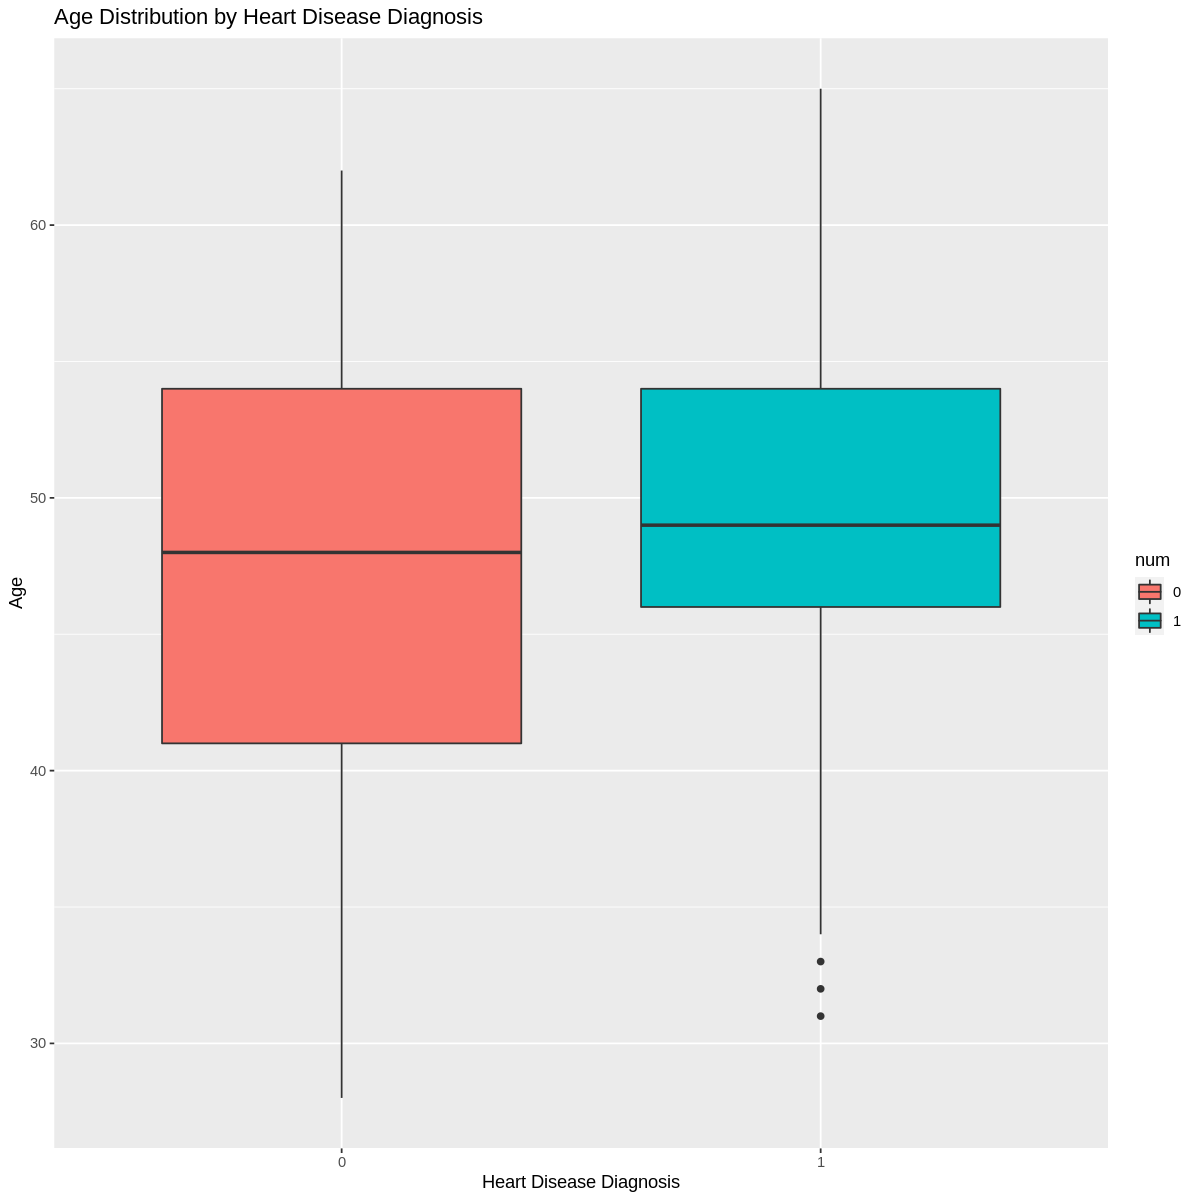

In [22]:
age_boxplot <- ggplot(heart_disease_tidy, aes(x = num, y = age, fill = num)) +
  geom_boxplot() +
  labs(x = "Heart Disease Diagnosis", y = "Age", title = "Age Distribution by Heart Disease Diagnosis")
age_boxplot

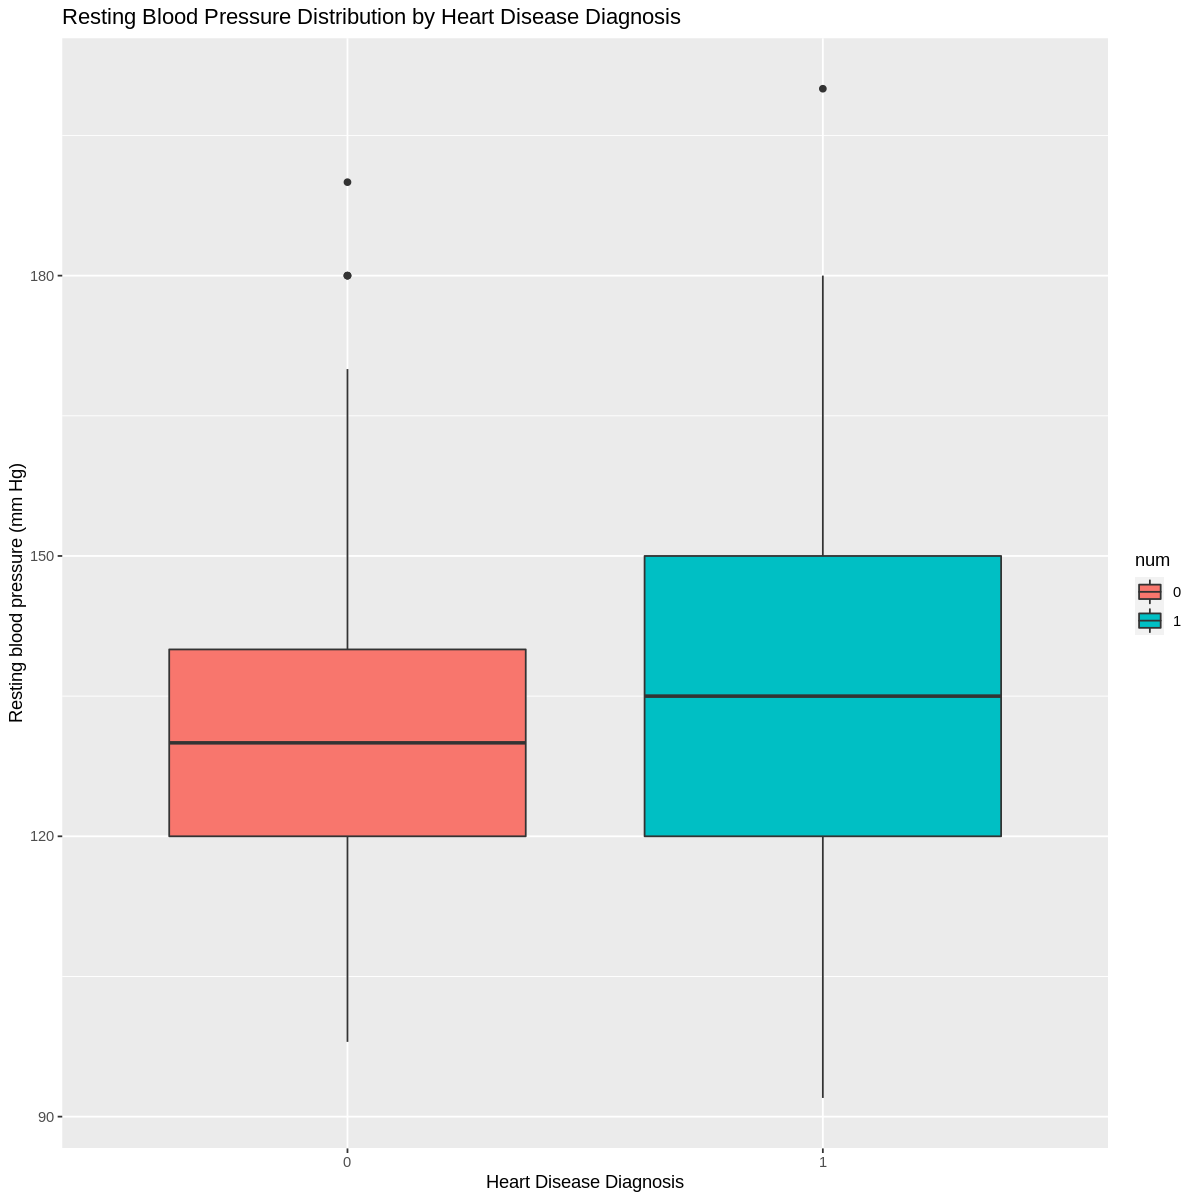

In [21]:
trestbps_boxplot <- ggplot(heart_disease_tidy, aes(x = num, y = trestbps, fill = num)) +
  geom_boxplot() +
  labs(x = "Heart Disease Diagnosis", y = "Resting blood pressure (mm Hg)", title = "Resting Blood Pressure Distribution by Heart Disease Diagnosis")
trestbps_boxplot

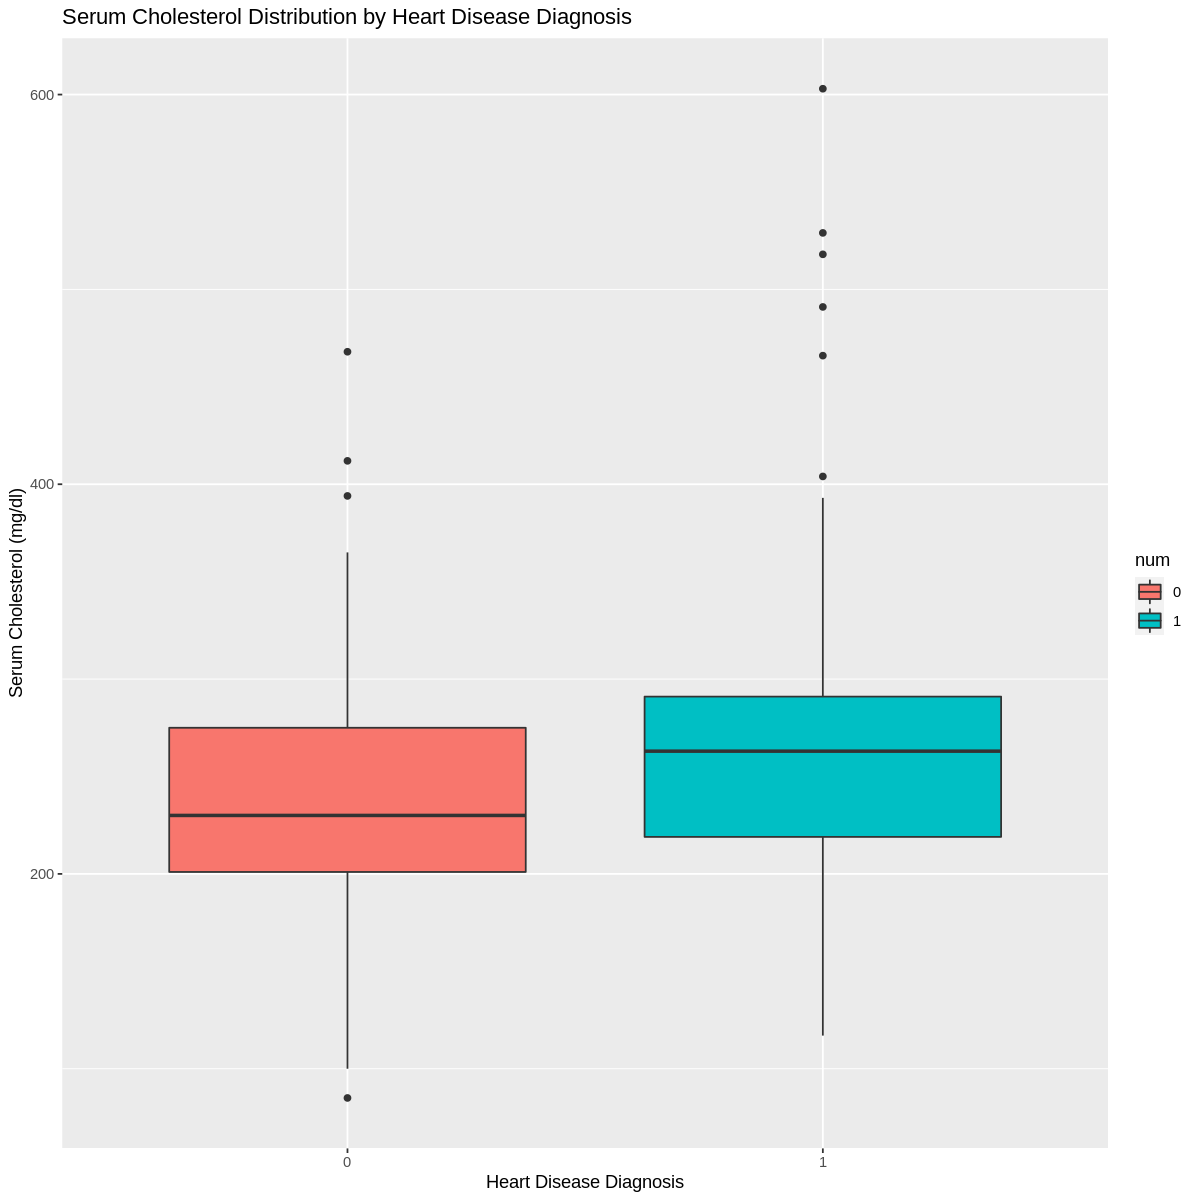

In [17]:
chol_boxplot <- ggplot(heart_disease_tidy, aes(x = num, y = chol, fill = num)) +
  geom_boxplot() +
  labs(x = "Heart Disease Diagnosis", y = "Serum Cholesterol (mg/dl)", title = "Serum Cholesterol Distribution by Heart Disease Diagnosis")
chol_boxplot

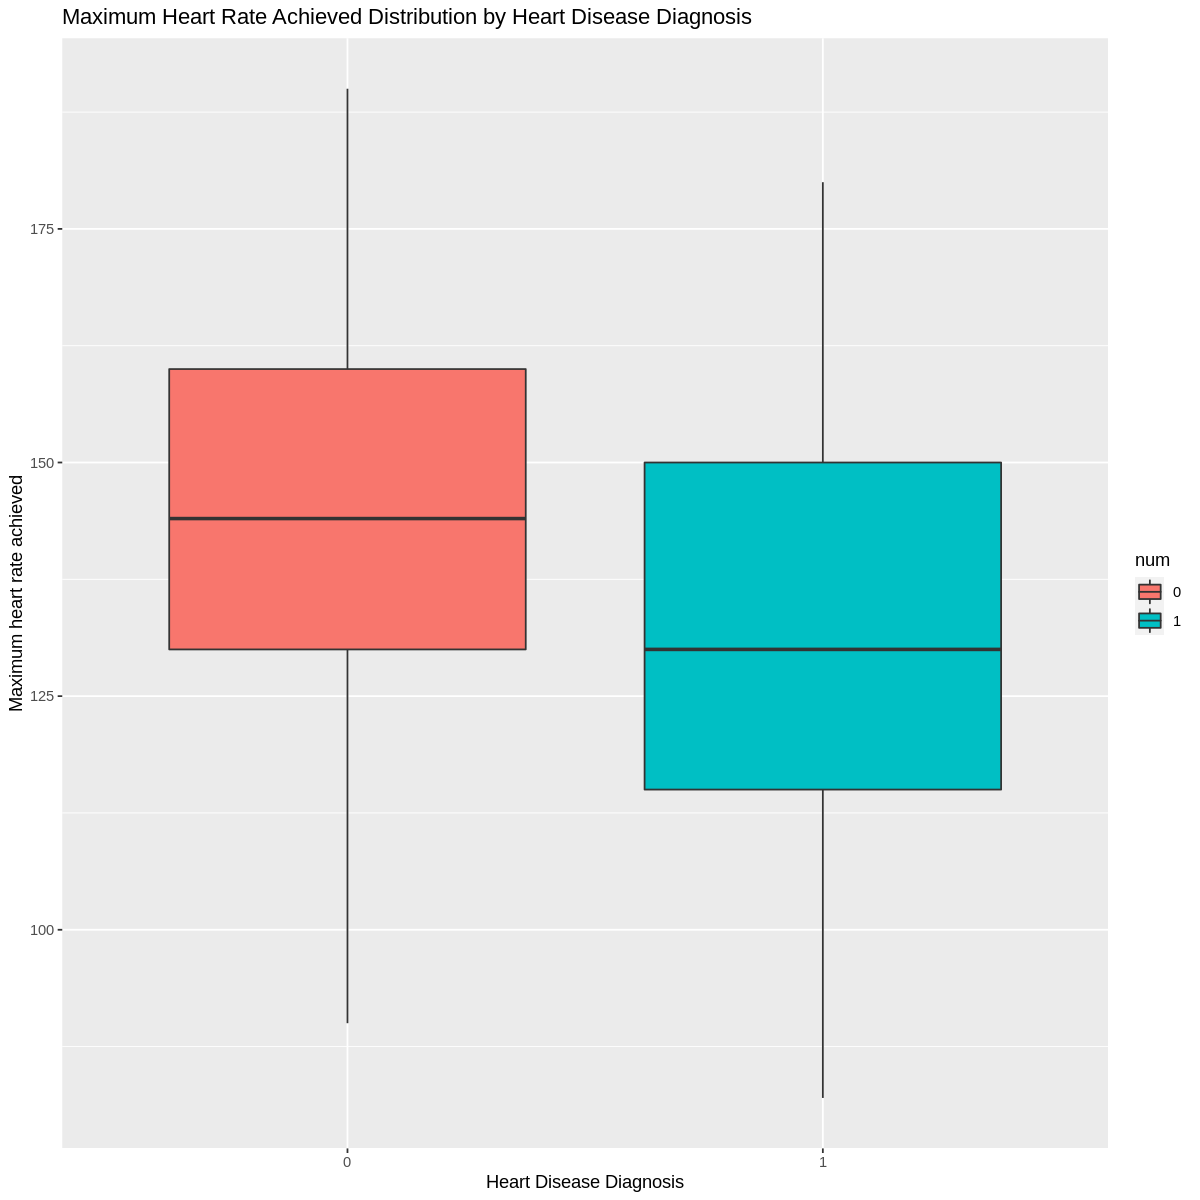

In [20]:
thalach_boxplot <- ggplot(heart_disease_tidy, aes(x = num, y = thalach, fill = num)) +
  geom_boxplot() +
  labs(x = "Heart Disease Diagnosis", y = "Maximum heart rate achieved", title = "Maximum Heart Rate Achieved Distribution by Heart Disease Diagnosis")
thalach_boxplot

The distributions above reveal that maximum heart rate achieved and age show greater variance and clear differentiation between heart disease diagnosis and non-diagnosis. For both variables, there is a distinct threshold where the likelihood of being diagnosed or non-diagnosed changes. For example, in age, values below 45 are more likely non-diagnosed (predicted 0), while above 45 are more likely diagnosed (predicted 1).

Conversely, chol (cholesterol levels) and trestbps (resting blood pressure) exhibit greater overlap in distribution, hindering clear differentiation between patient groups. This lack of clear distinction could hinder the model's ability to accurately predict heart disease diagnosis, which is why these variables were removed from the dataset.

In [100]:
heart_disease_final <- heart_disease_tidy |> 
                        select(-chol, -trestbps)

### 3. Classification Part 1: Finding optimal k value

The original data is split into a training and testing set. The training set is comprised of 75% of the original data and is used to create the classification model. A 5-fold cross-validation is implemented on the training set to determine the optimal number of neighbors for the model. This will allow us to evaluate the model's performance for a range of different k values and choose the value that results in the best accuracy.

We also scaled and centered the data to ensure that features with different units and scales are treated equally, which improved the performance of the model. 

#### Split the data set into training and test set.

In [106]:
set.seed(4000)
heart_disease_split <- initial_split(heart_disease_final, prop = 0.75, strata = num)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)
head(heart_disease_train)
head(heart_disease_test)

,age,thalach,num
,<int>,<int>,<fct>
4,31,150,0
5,32,165,0
7,32,155,0
10,34,168,0
11,34,150,0
12,35,185,0


,age,thalach,num
,<int>,<int>,<fct>
1,28,185,0
2,29,160,0
3,30,170,0
6,32,184,0
8,33,185,0
9,34,190,0


#### Create model specification and recipe

In [107]:
heart_disease_recipe <- recipe(num ~ age + thalach, data = heart_disease_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())
heart_disease_recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

#### 5-fold cross-validation

In [108]:
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)
k_vals <- tibble(neighbors = seq(from = 1, to = 60, by = 2))

#### Creating the workflow and computing the accuracy

In [109]:
heart_disease_wkflw <- workflow() |>
  add_recipe(heart_disease_recipe) |>
  add_model(knn_spec)

heart_disease_results <- heart_disease_wkflw |>
  tune_grid(resamples = heart_disease_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- heart_disease_results |>
filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6162195,5,0.04468002,Preprocessor1_Model01
3,accuracy,binary,0.6562195,5,0.03293044,Preprocessor1_Model02
5,accuracy,binary,0.5963415,5,0.05292915,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,accuracy,binary,0.6564634,5,0.01573431,Preprocessor1_Model28
57,accuracy,binary,0.6565854,5,0.01297563,Preprocessor1_Model29
59,accuracy,binary,0.6565854,5,0.01028917,Preprocessor1_Model30


#### Deciding on which number of neighbors is best

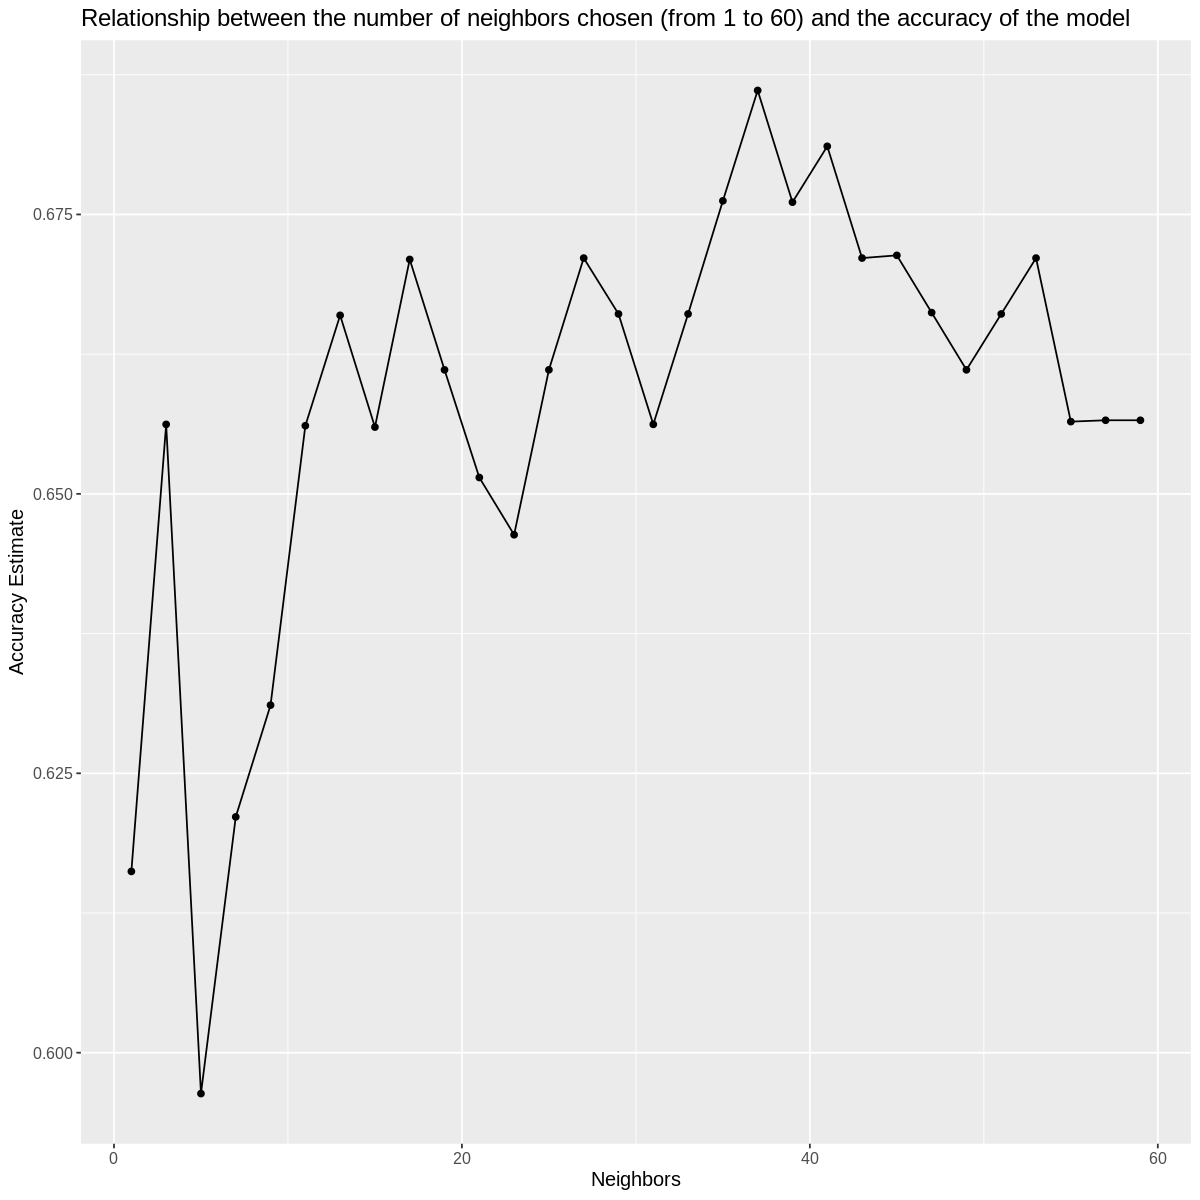

In [110]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Relationship between the number of neighbors chosen (from 1 to 60) and the accuracy of the model") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

Based on the plot, we choose K = 37 as it yields the highest estimated accuracy. Deviating slightly from this value doesn't lead to a significant decrease in accuracy. Moreover, K = 37 is not excessively large, which means that the cost of training the model is still feasible. 

### 4. Classification Part 2: Determining accuracy of predictors

Now that the optimal k value is known, we input it into a new model specification to make predictions on the test data.

In [111]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 37) |>
      set_engine("kknn") |>
      set_mode("classification")

In [112]:
heart_disease_fit <- workflow() |>
      add_recipe(heart_disease_recipe) |>
      add_model(knn_spec) |>
      fit(data = heart_disease_train)
heart_disease_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(37,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3333333
Best kernel: rectangular
Best k: 37

#### Make predictions on the test data and calculate accuracy

In [113]:
heart_disease_test_predictions <- predict(heart_disease_fit , heart_disease_test) |>
       bind_cols(heart_disease_test)
head(heart_disease_test_predictions)

.pred_class,age,thalach,num
<fct>,<int>,<int>,<fct>
0,28,185,0
0,29,160,0
0,30,170,0
0,32,184,0
0,33,185,0
0,34,190,0


In [114]:
heart_disease_prediction_accuracy <- heart_disease_test_predictions |>
        metrics(truth = num, estimate = .pred_class) 
heart_disease_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6376812
kap,binary,0.1140216


Although 63% is better than random guessing, it is still generally low for a classification model. We decided to investigate this further by looking at the confusion matrix.

In [115]:
heart_disease_conf_mat <- heart_disease_test_predictions|>
                conf_mat(truth = num, estimate = .pred_class)
heart_disease_conf_mat

          Truth
Prediction  0  1
         0 39 21
         1  4  5

The model correctly predicted 39 cases and non-diagnosed and correctly predicted 5 cases as diagnosed. The model incorrectly predicted 21 cases as non-diagnosed when they were actually diagnosed and it incorrectly predicted 4 cases as diagnosed when they were actually diagnosed. This indicates that the model has a higher rate of misclassifying diagnosed patients as diagnosed. In the context of heart disease diagnosis, this could have serious health consequences as these patients may not receive timely treatment or intervention.

### 5. Final Visualization

#### A. Without Our Model

Warning message:
“Removed 1 rows containing missing values (geom_point).”


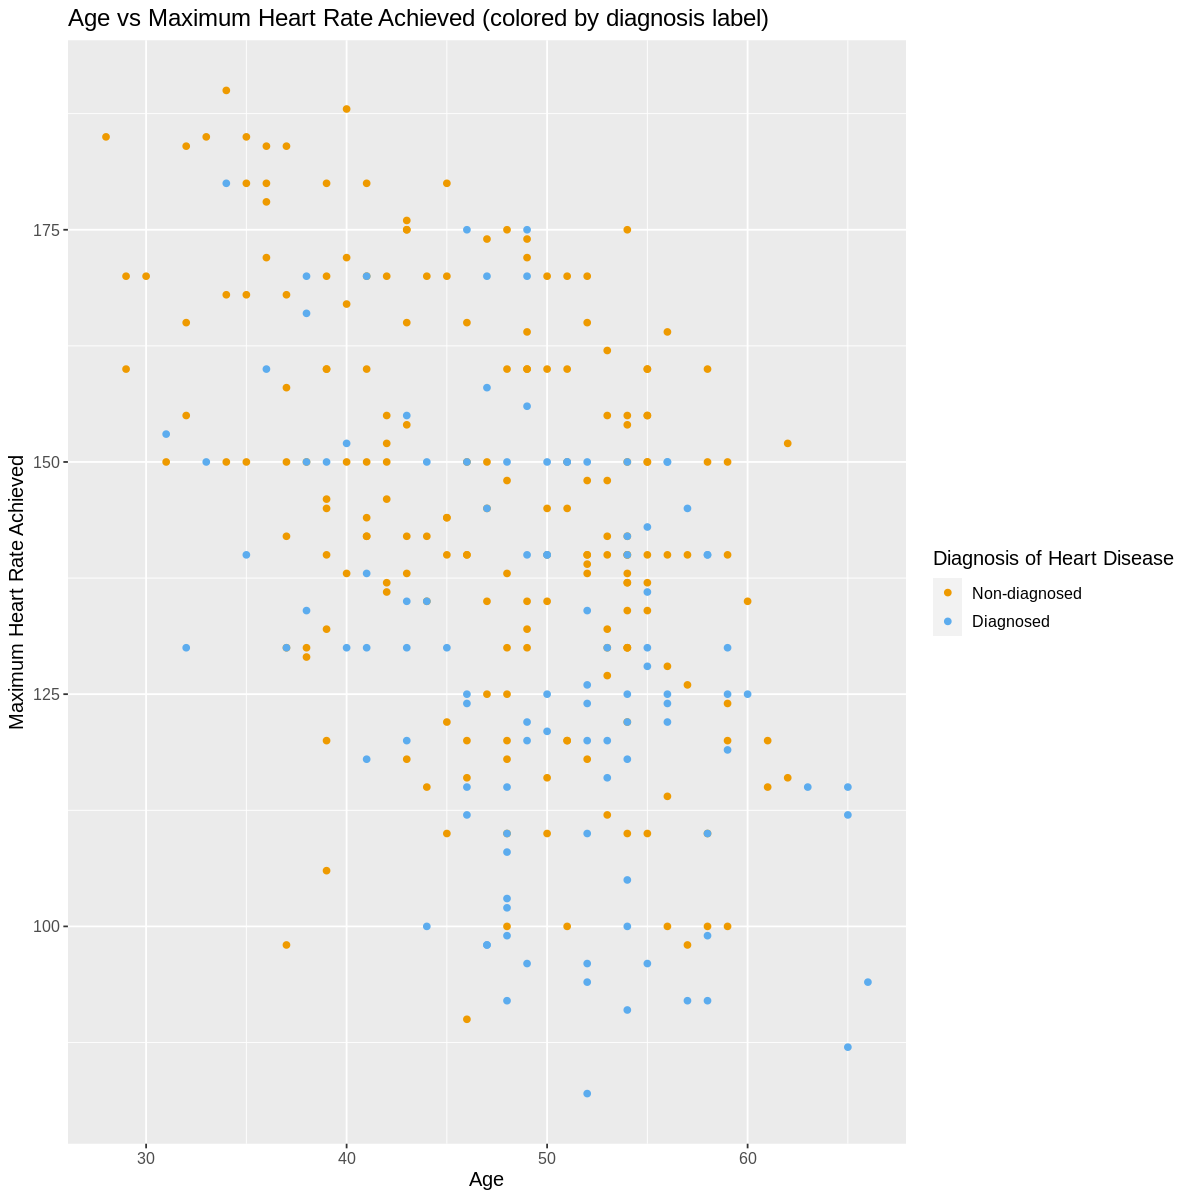

In [120]:
ggplot(hungarian_heart_disease_data, aes(x=age,y=thalach,colour=num))+
geom_point() +
labs(title = "Age vs Maximum Heart Rate Achieved (colored by diagnosis label)",
     color = "Diagnosis of Heart Disease", 
       x = "Age", 
       y = "Maximum Heart Rate Achieved") +
  scale_color_manual(labels = c("Non-diagnosed", "Diagnosed"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))

From the original distribution, we can see that diagnosis and non-diagnosis is not clearly distinctive based on the two predictors. In addition, it seems that lower maximum heart rates are rare among younger ages and higher maximum heart rates are rare among older ages.

#### B. Implementing Our Model

Warning message:
“Removed 1 rows containing missing values (geom_point).”


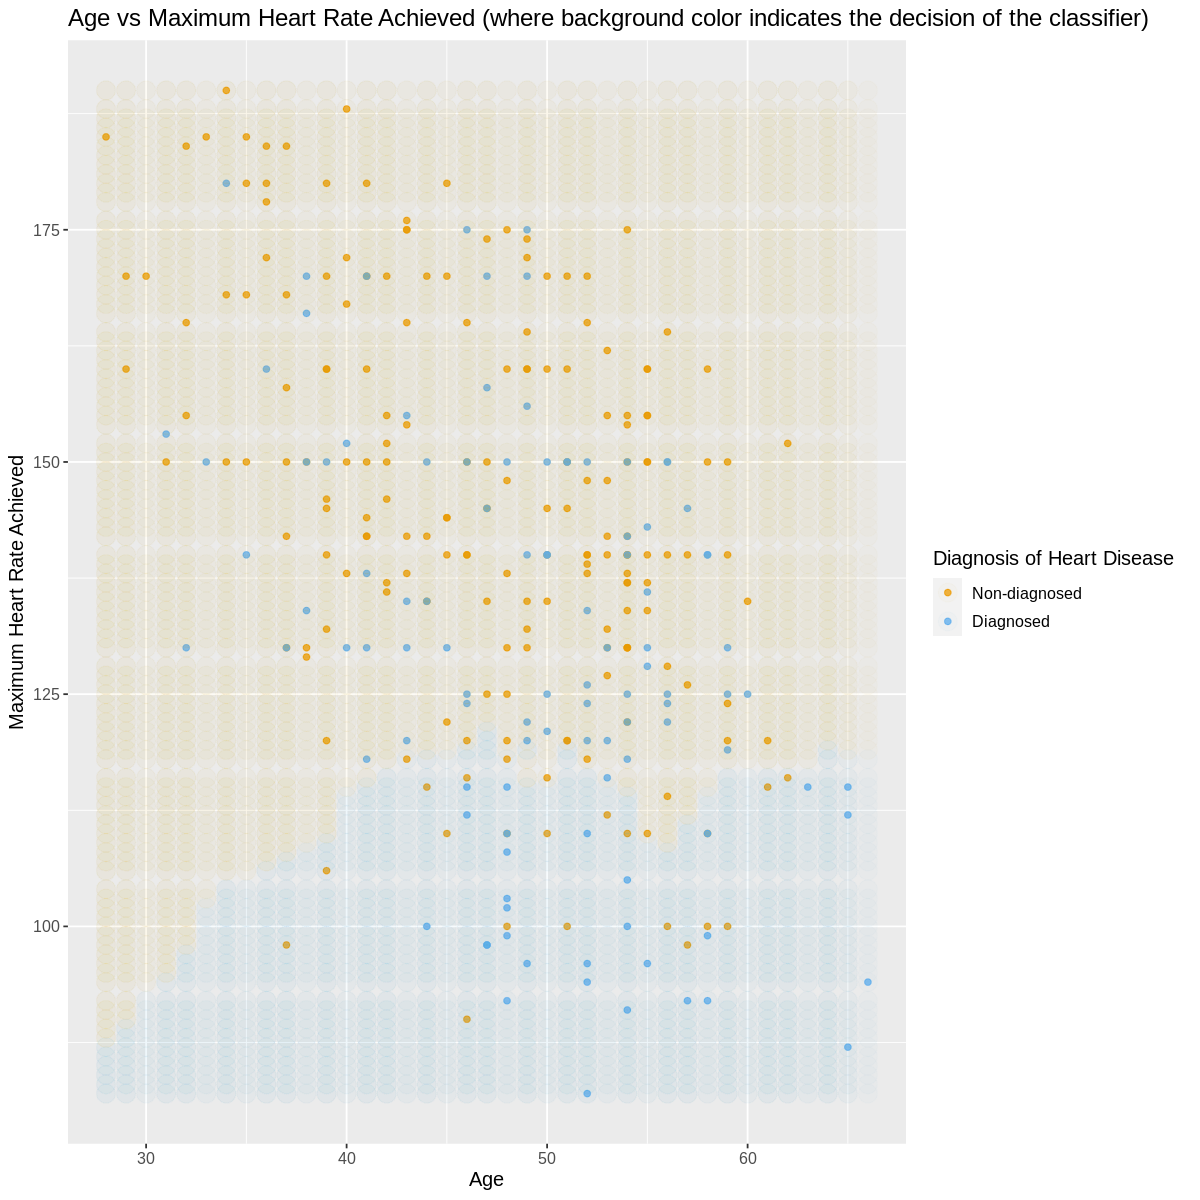

In [121]:
age_grid <- seq(min(hungarian_heart_disease_data$age,na.rm=TRUE), 
                max(hungarian_heart_disease_data$age,na.rm=TRUE), 
                length.out = 100)
thalach_grid <- seq(min(hungarian_heart_disease_data$thalach,na.rm=TRUE), 
                max(hungarian_heart_disease_data$thalach,na.rm=TRUE), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(age = as.integer(age_grid), 
                                thalach = as.integer(thalach_grid)))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(heart_disease_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
  rename(num = .pred_class)

wkflw_plot <-
  ggplot() +
  geom_point(data = hungarian_heart_disease_data, 
             mapping = aes(x = age, 
                           y = thalach, 
                           color = num), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = age, 
                           y = thalach, 
                           color = num), 
             alpha = 0.02, 
             size = 5) +
  labs(title = "Age vs Maximum Heart Rate Achieved (where background color indicates the decision of the classifier)",
       color = "Diagnosis of Heart Disease", 
       x = "Age", 
       y = "Maximum Heart Rate Achieved") +
  scale_color_manual(labels = c("Non-diagnosed", "Diagnosed"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))

wkflw_plot

The graph shows that there is a lack of a clear and smooth decision boundary suggesting that the model may not be performing well enough. The random decision boundary and instances of diagnoses predictions within the non-diagnosed prediction area indicates that the model is not capturing the complexity of the relationship between the predictors and the diagnostic variable. This could result in underfitting, where the model is too simplistic and does not generalize well to new data.

Additionally, the relatively high K value of 37 could be contributing to the underfitting. When the K value is high, the classifier takes into account a larger number of neighbors, which leads to a smoother decision boundary but also causes the model to lose sensitivity to smaller patterns in the data. The insensitivity to patterns could result in poor performance when predicting diagnoses.

## Discussion

In this study, we attempted to determine the likelihood of heart disease diagnosis based on various clinical factors. Among the numerical variables, maximum heart rate achieved and age stood out as the two most distinctive predictors for our model, as they exhibit differing distributions between diagnosed and non-diagnosed patients.

We identified from vizaluaization that higher maximum heart rates at any age are associated with a lower likelihood of heart disease diagnosis. This may be due to the fact that a higher maximum heart rate may demonstrate sustainability in consuming and transporting oxygen throughout the body, which optimizes cardiac functions and lowers the risk of disease (2). On the other hand, age has been shown to be a key risk factor for cardiovascular disease due to stiffened and thickened arteries and restricted blood flow, which thereby increases the deterioration of regular cardiovascular functions and promotes disease (3). These reasons explain why we see greater areas of diagnosis at higher ages and barely any below the age of 40.

Interestingly, our dataset did not show large variances in value distributions for other known risk factors, such as blood pressure and cholesterol levels. Nonetheless, it is inconclusive to assume that this applies to the any population, as studies have shown that these are significant determinants of disease as well (4-5). This could be attributed to the small sample size (approximately 264 patients), potential sample bias, and individual variations. These limitations may also explain the relatively low accuracy of our predictive model and the observed inconsistencies in the final visualization.

Our confusion matrix revealed that the model is better at predicting non-diagnosed cases than diagnosed cases, with a considerable number of false negatives. For a heart disease diagnosis model, this could have severe health implications, as misclassified patients may not receive timely treatment or intervention. To optimize the model, we could minimize the effect of unequal sample sizes, incorporate data from larger or more diverse populations, and consider normalizing maximum heart rate values for different age groups.

As a consequence of the imperfections of our model, we do observe inconsistencies in our final visualization, where small arbitrary patches of diagnosis classification appear within large areas of non-diagnosis classification and vice versa. Some ways to optimize the model include further minimizing the effect of the difference in sample sizes, tuning the model with heart disease data from larger or varying populations, and possibly normalizing the maximum heart rate against the standard value for different age groups to lower the effects of individual variance.

As mentioned previously, pre-identification of risk of heart disease is one of the greatest preventions. However, clinical assessments of cholesterol levels and major vessels, are inaccessible to those of regular households. One strength of our model is its reliance on predictors that can be easily and regularly assessed by individuals, facilitating self-monitoring and raising awareness of cardiovascular disease risk. However, the model's relatively low accuracy and applicability to the general population must be carefully considered before relying on it for self-assessment and prediction.

Future research could explore additional factors that influence heart disease risk, such as exercise, diet, smoking, and diabetes, which were not available in our dataset. Comparing this model with others over time could also help identify the most significant factors for predicting heart disease diagnosis and guide future research efforts in disease prevention. 

## References

(1) “Cardiovascular Diseases.” World Health Organization, World Health Organization, https://www.who.int/health-topics/cardiovascular-diseases.

(2) “What Your Heart Rate Is Telling You.” Harvard Health, 30 Aug. 2020, https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you.

(3) Rodgers, Jennifer L et al. “Cardiovascular Risks Associated with Gender and Aging.” Journal of cardiovascular development and disease vol. 6,2 19. 27 Apr. 2019, doi:10.3390/jcdd6020019

(4) Fuchs, Flávio D, and Paul K Whelton. “High Blood Pressure and Cardiovascular Disease.” Hypertension (Dallas, Tex. : 1979) vol. 75,2 (2020): 285-292. doi:10.1161/HYPERTENSIONAHA.119.14240

(5) Carson, Jo Ann S et al. “Dietary Cholesterol and Cardiovascular Risk: A Science Advisory From the American Heart Association.” Circulation vol. 141,3 (2020): e39-e53. doi:10.1161/CIR.0000000000000743